## Plot one trace of plate comparison for p38:Bosutinib

In [1]:
# import libraries & packages

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.offsetbox import AnchoredText
import matplotlib.cm as cm
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
import matplotlib
from glob import glob


import assaytools


from assaytools import platereader

In [2]:
# get data for each plate type single well

plate_list = ('UV', 'NB', 'COC')

final_data_prot = list()
final_data_buff = list()

for plate in plate_list:
    # load data files
    filenames = sorted(glob('infinite_results/%s/*.xml' %(plate)))
    filenames.sort(key=os.path.getmtime)
    
    # read data files
    reads = list()
    nreads = len(filenames)
    for read in range(nreads):
        read = platereader.read_icontrol_xml(filenames[read])
        reads.append(read)

    # organize data for wells A2 (protein) and B1 (buffer) across ligand concentration
    nconc = 17

    label = 'ex280_em480_top_gain100'

    well_prot = 'A2'
    well_buff = 'B1'

    data = np.zeros((nconc), np.float64)
    data = np.zeros((nconc), np.float64)

    measurements_prot = [(reads[i][label][well_prot]) for i in range(nconc)]
    measurements_buff = [(reads[i][label][well_buff]) for i in range(nconc)]
    for i in range(nconc):
        measurements_prot = [x if x != 'OVER' else 0 for x in measurements_prot]
        measurements_prot = [float(i) for i in measurements_prot]
        measurements_buff = [x if x != 'OVER' else 0 for x in measurements_buff]
        measurements_buff = [float(i) for i in measurements_buff]
    final_data_prot.append(measurements_prot)
    final_data_buff.append(measurements_buff)
    
# convert lists to arrays 
final_data_prot = np.asarray(final_data_prot)
final_data_buff = np.asarray(final_data_buff)


# get data for multiple well

filenames = ['p38_4ti-0223_Bos_20190613_134957.xml']

datapath = 'infinite_results/4ti0223'

reads_4ti0223 = list()
nreads_4ti0223 = len(filenames)
for read in range(nreads_4ti0223):
    read = platereader.read_icontrol_xml(os.path.join(datapath, filenames[read]))
    reads_4ti0223.append(read) 
    
Bos_prot = np.zeros(12)
Bos_buff = np.zeros(12)
ncol = 12
for well in range(ncol):
    index = well + 1
    prot_well_name = 'C%s' % (index)
    Bos_prot[well] = reads_4ti0223[0]['ex280_scan_top_gain100'][prot_well_name]['480']
    buff_well_name = 'D%s' % (index)
    Bos_buff[well] = reads_4ti0223[0]['ex280_scan_top_gain100'][buff_well_name]['480']

In [3]:
# define ligand concentrations

conc_17 = np.array([  0.00000000e+00,   8.00000000e-09,   1.34778097e-08,
         2.27064194e-08,   3.82541000e-08,   6.44476851e-08,
         1.08576705e-07,   1.82922021e-07,   3.08173524e-07,
         5.19188015e-07,   8.74689659e-07,   1.47361260e-06, 2.48263378e-06,
         4.18255821e-06, 7.04646547e-06, 1.118713651e-05, 2.0e-05])

conc_12 = np.array([  0.00000000e+00,   8.00000000e-09,   1.75e-08,
         3.83e-08,   8.37e-08,   1.83e-07,
         4e-07,   8.75e-07,   1.91e-06,
         4.18e-06,   9.15e-06,   2e-05])

In [4]:
# create function to plot figure

def plot(conc, prot, buff, i, prot_label, buff_label):

    sns.set_style(style='white')
    sns.despine()
    
    current_palette = sns.color_palette('GnBu_d',4)
    sns.set_palette(current_palette)
    
    plt.semilogx(conc, prot, linewidth=2, c=current_palette[i], marker='o', label='%s' %(prot_label))
    plt.semilogx(conc, buff, linewidth=2, c=current_palette[i], linestyle='--', label='%s' %(buff_label))

/Applications/miniconda3/envs/assaytools/lib/python3.6/site-packages/matplotlib/pyplot.py:1442: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_xlim(*args, **kwargs)


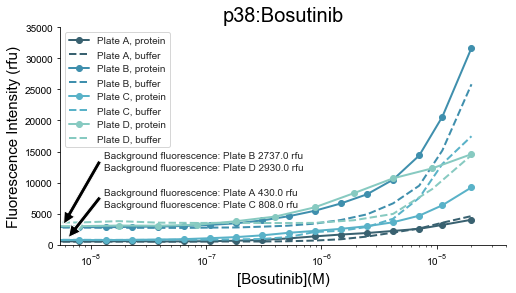

In [5]:
# plot figure

fig,axes = plt.subplots(nrows=1, ncols=1, figsize=[8,4])

plate_A = plot(conc=conc_17, prot=final_data_prot[0], buff=final_data_buff[0], i=0, prot_label='Plate A, protein',
              buff_label='Plate A, buffer')
plate_B = plot(conc=conc_17, prot=final_data_prot[1], buff=final_data_buff[1], i=1, prot_label='Plate B, protein',
              buff_label='Plate B, buffer')
plate_C = plot(conc=conc_17, prot=final_data_prot[2], buff=final_data_buff[2], i=2, prot_label='Plate C, protein',
              buff_label='Plate C, buffer')
plate_D = plot(conc=conc_12, prot=np.flip(Bos_prot), buff=np.flip(Bos_buff), i=3, prot_label='Plate D, protein',
              buff_label='Plate D, buffer')

### add background fluorescence descriptions for each plate type
# plate A
plt.annotate('Background fluorescence: Plate A %s rfu' %(final_data_buff[0][0]), xy=(0.000000013, 8000), xycoords='data')
# plate B (first is text, second is arrow)
plt.annotate('Background fluorescence: Plate B %s rfu' %(final_data_buff[1][0]), xy=(0.000000013, 14000), xycoords='data')
plt.annotate('', xy=(5.6e-09, final_data_buff[1][0]), xytext=(0.0000000125, 14000), xycoords='data', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='left', verticalalignment='bottom')
# plate C
plt.annotate('Background fluorescence: Plate C %s rfu' %(final_data_buff[2][0]), xy=(0.000000013, 6000), xycoords='data')
plt.annotate('', xy=(6.2e-09, final_data_buff[2][0]), xytext=(0.0000000125, 8000), xycoords='data', arrowprops=dict(facecolor='black', shrink=0.05), horizontalalignment='left', verticalalignment='bottom')
# plate D
plt.annotate('Background fluorescence: Plate D %s rfu' % (np.flip(Bos_prot[11])), xy=(0.000000013, 12000), xycoords='data')

plt.xlim(0,4e-5)
plt.ylim(0,35000)
plt.tick_params(axis='both', which='major', labelsize=12)

plt.title('p38:Bosutinib', fontsize=20)
plt.xlabel('[Bosutinib](M)', fontsize=15)
plt.ylabel('Fluorescence Intensity (rfu)', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=10)


plt.legend(loc='upper left')

fig.savefig('20190614_single_well_plate_comparison_extra_rfu.pdf', bbox_inches='tight', dpi=300)
fig.savefig('20190614_single_well_plate_comparison_extra_rfu.svg', bbox_inches='tight', dpi=300)